### 1. Importing necessary libraries for building and training the CNN model

In [24]:
#type:ignore
import os # To interact with the file paths
import tensorflow as tf # Tensorflow library to build and train the CNN Model
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # To create visualization
from tensorflow.keras import Sequential # To build model using Sequential API or to build sequential models
from tensorflow.keras.layers import Dropout # To drop neurons to avoid overfitting
from helper_function import load_prep_image, plot_loss_curve, pred_and_plot, evaluation_metrics, visualize_predictions # Custom helper functions 
from tensorflow.keras.applications import Xception # Pre-trained mode for transfer learning  
from tensorflow.keras.regularizers import l2 # To prevent overfitting
from sklearn.metrics import classification_report, accuracy_score # To generate the precision, recall, f1-score and accuracy score of the model
from tensorflow.keras import layers # For additional layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # To preproces the image and data augmentation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Layers for building the CNN model
from tensorflow.keras.optimizers import Adam # Adam optimizer for training 

In [2]:
# Looking at the no. of folders and images in the directory
# This helps ensure the dataset is correctly organized and has the expected number of images
for dirpath, dirnames, filenames in os.walk("dataset"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in the {dirpath}")

print("\n")

# Getting the class names using pathlib
# This is useful for understanding the categories in the dataset
import pathlib
data_dir = pathlib.Path("dataset/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the subdirectory
print(f"There are {len(class_names)} classes.\n1.{class_names[0]} \n2.{class_names[1]}")


There are 3 directories and 0 images in the dataset
There are 2 directories and 0 images in the dataset\test
There are 0 directories and 2000 images in the dataset\test\cats
There are 0 directories and 2000 images in the dataset\test\dogs
There are 2 directories and 0 images in the dataset\train
There are 0 directories and 6000 images in the dataset\train\cats
There are 0 directories and 6000 images in the dataset\train\dogs
There are 2 directories and 0 images in the dataset\val
There are 0 directories and 500 images in the dataset\val\cats
There are 0 directories and 500 images in the dataset\val\dogs


There are 2 classes.
1.cats 
2.dogs


### 2. Loading the training data using ImageDataGenerator. Rescaling pixel values to [0, 1] and setting up the data generator for binary classification.

In [3]:
# Data_gen which will rescale the images when loaded 

train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)
val_datagen = ImageDataGenerator(rescale= 1/255.)

# Setting up the training, testing and validation data directories
train_dir = 'dataset/train/'
test_dir = 'dataset/test/'
val_dir = 'dataset/val/'

# Set image size to (224, 224) to match the input size expected by the model 
Image_size = (224, 224)
# Load data from the directories
# Using batch size of 32 for faster training 
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, class_mode='binary',target_size=Image_size )
val_data = val_datagen.flow_from_directory(val_dir, batch_size=32, class_mode='binary',target_size=Image_size)
test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, class_mode='binary',target_size=Image_size)

Found 12000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


### 3. Creating a Model Checkpoint which monitor the validation accuracy

In [4]:
# Create checkpoints callbacks
checkpoint_path = 'dog_cat_classification_checkpoint.weights.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor = 'val_accuracy', # This checkpoint will monitor the validation accuracy and will store the best of all 
                                                         verbose = 1,
                                                         save_weights_only = True,
                                                         save_best_only = True)

### 4. Defining the CNN model 1 architecture with two convolutional layers followed by max-pooling, a flatten layer, and two dense layers for binary classification.

In [ ]:
# Model 0: A simple CNN with two convolutional layers
model_0 = Sequential([
    # Adding the first block of CNN layer
    Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(224, 224, 3)), # 32 filters, kernel_size = 3
    MaxPooling2D((2, 2)), # Max pooling layer to reduce the spacial dimensions
    Dropout(0.2), # This Dropout layer will drop 20% of the neurons to prevent overfitting

    # Adding the second block of CNN layer
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(), # Flatten to convert the 2D feature mapt into a 1D vector
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5), # This Dropout layer will drop 50% of the neurons to prevent overfitting
    Dense(1, activation='sigmoid')  # 1 unit since this is output layer and it is binary classification and activation sigmoid for binary classification
])


# Compiling the model using binary cross-entropy, Adam optimizer and accuracy as evaluation metric 
model_0.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics = ['accuracy']) 


# Fit the model to the training and validation data 
history_0 = model_0.fit(train_data, epochs=10, steps_per_epoch = len(train_data) , validation_data=val_data,  callbacks=[checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 1.3939 - accuracy: 0.5077
Epoch 1: val_accuracy improved from -inf to 0.52200, saving model to dog_cat_classification_checkpoint.weights.h5
375/375 [==============================] - 43s 93ms/step - loss: 1.3939 - accuracy: 0.5077 - val_loss: 0.9077 - val_accuracy: 0.5220
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.7969 - accuracy: 0.5362
Epoch 2: val_accuracy improved from 0.52200 to 0.61300, saving model to dog_cat_classification_checkpoint.weights.h5
375/375 [==============================] - 34s 91ms/step - loss: 0.7969 - accuracy: 0.5362 - val_loss: 0.7278 - val_accuracy: 0.6130
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.7034 - accuracy: 0.5653
Epoch 3: val_accuracy did not improve from 0.61300
375/375 [==============================] - 34s 90ms/step - loss: 0.7034 - accuracy: 0.5653 - val_loss: 0.6963 - val_accuracy: 0.5650
Epoch 4/10
375/375 [===========

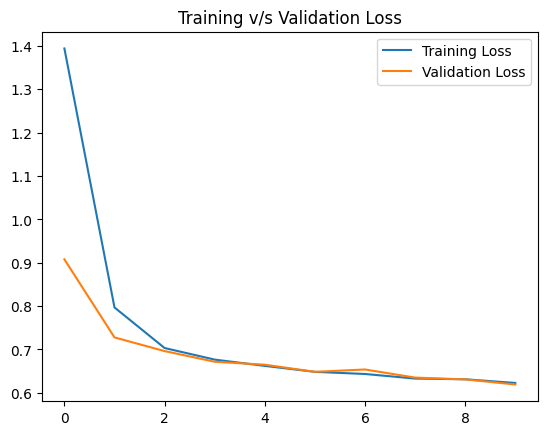

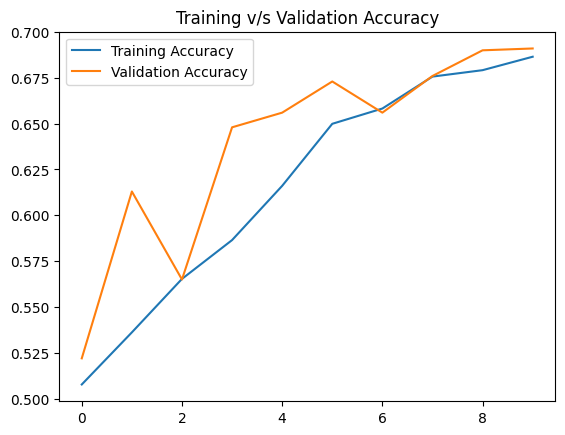

In [6]:
# Plotting Loss and accuracy of training vs validation 
# This is the custom function I built
plot_loss_curve(history_0)

In [19]:
# Evaluate the model on the test data
y_pred = model_0.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate classification report
print(classification_report(test_data.classes, y_pred))

125/125 [==============================] - 6s 45ms/step
              precision    recall  f1-score   support

           0       0.49      0.62      0.55      2000
           1       0.49      0.37      0.42      2000

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



1/1 [==============================] - 0s 132ms/step


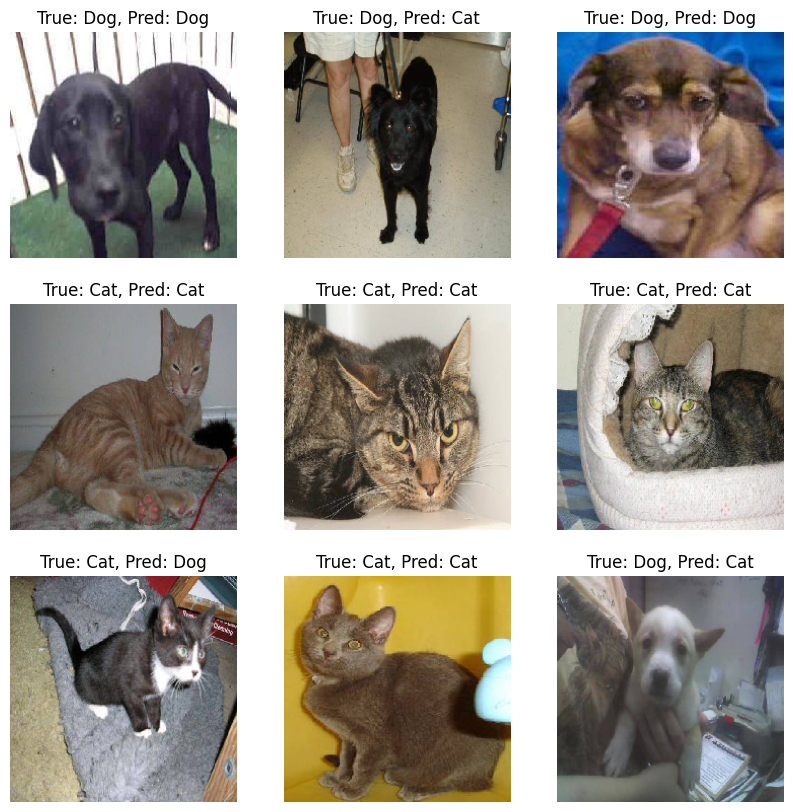

In [7]:
# Taking random images of test data and making predictions on them
visualize_predictions(model_0, test_data)

### 5. Creating Model 1 with `Data Augmentation`

Applying data augmentation techniques to the training dataset. This includes rotation, width/height shifting, shearing, zooming, and horizontal flipping. These augmentations help the model generalize better by exposing it to more variations of the training data.

In [14]:
train_data_generator = ImageDataGenerator(
    rescale=1/255., # Normalize the pixel values
    rotation_range=30, # Randomly rotate the images by up to 30 degrees
    width_shift_range=0.2, # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2, # Randomly shift images vertically by up to 20%
    shear_range=0.2, # Apply shear transformations
    zoom_range=0.2, # Randomly zoom in/out by up to 20%
    horizontal_flip=True # Randomly flip images horizontally 
)

# Load augmented training data
train_data_augmented = train_data_generator.flow_from_directory(train_dir, batch_size=32, class_mode='binary', target_size=Image_size)

Found 12000 images belonging to 2 classes.


#### 5.1. Building Model 1 with `Data Augmentation`

In [ ]:
# Model 1: A CNN model training on augmented data
model_1 = Sequential([
        Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),

        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
])
# Compile the model
model_1.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# Fit the model with augmented data
history_1 = model_1.fit(train_data_augmented, epochs = 10,validation_data = val_data, callbacks = [checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5544
Epoch 1: val_accuracy did not improve from 0.69100
375/375 [==============================] - 85s 222ms/step - loss: 0.6919 - accuracy: 0.5544 - val_loss: 0.7359 - val_accuracy: 0.5280
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.6235
Epoch 2: val_accuracy did not improve from 0.69100
375/375 [==============================] - 83s 221ms/step - loss: 0.6485 - accuracy: 0.6235 - val_loss: 0.6316 - val_accuracy: 0.6350
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.6754
Epoch 3: val_accuracy improved from 0.69100 to 0.72900, saving model to dog_cat_classification_checkpoint.weights.h5
375/375 [==============================] - 82s 218ms/step - loss: 0.6053 - accuracy: 0.6754 - val_loss: 0.5556 - val_accuracy: 0.7290
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.

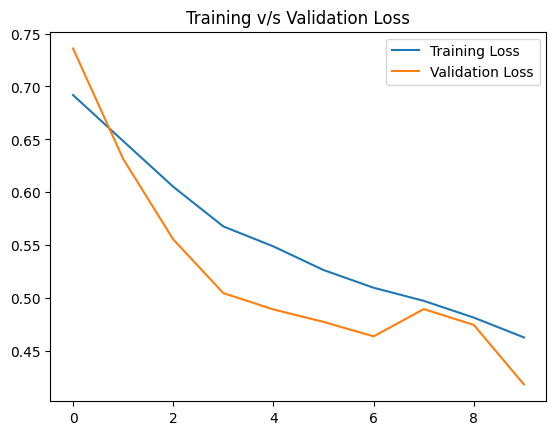

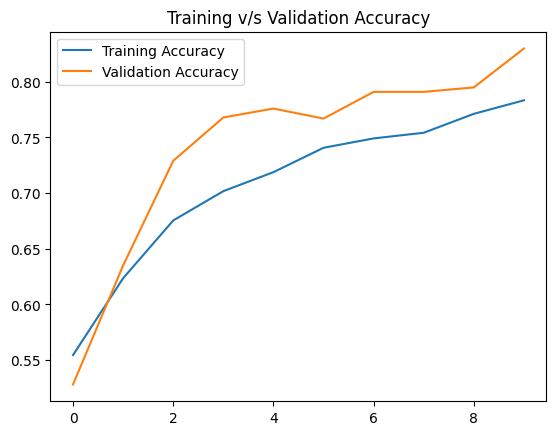

In [ ]:
# Plotting Loss and accuracy of training vs validation 
plot_loss_curve(history_1)

In [20]:
# Evaluate the model on the test data
y_pred = model_1.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate classification report
print(classification_report(test_data.classes, y_pred))

125/125 [==============================] - 6s 50ms/step
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      2000
           1       0.51      0.50      0.51      2000

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



1/1 [==============================] - 0s 77ms/step


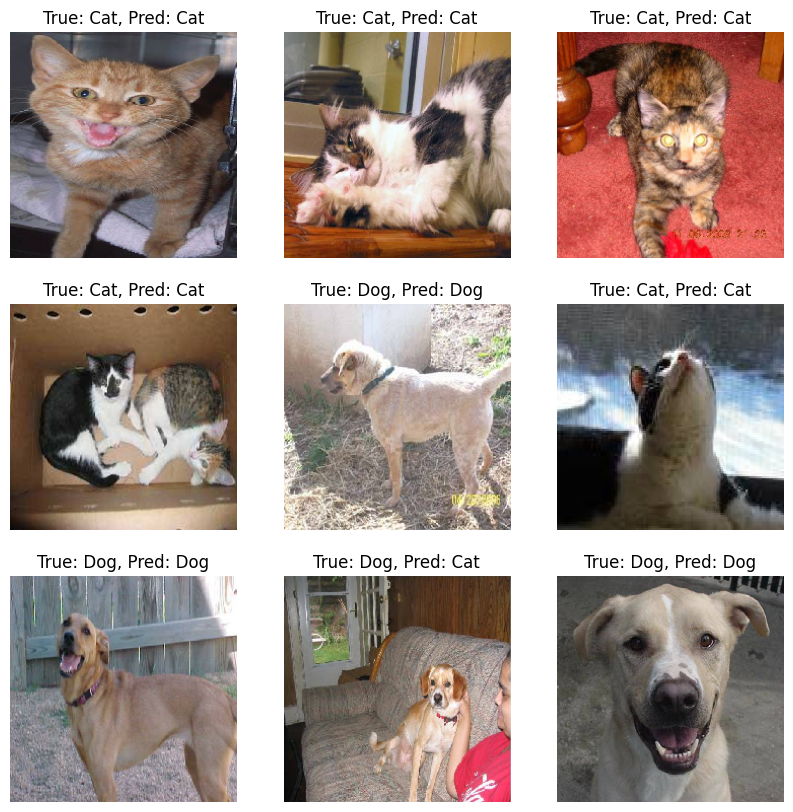

In [21]:
# Taking random images of test data and making predictions on them
visualize_predictions(model_1, test_data)

### 6. Using Transfer learning 
Using the Xception pre-trained model from Keras for transfer learning. The base model is frozen to retain its pre-trained weights, and a new classification head is added with a global average pooling layer and a dense layer.

In [ ]:
### Trying transfer learning
xception_model = Xception(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)) # Here the Xception model is trained on Imagenet, which is used as feature extractor 
# Include top is False as I am going to another classification head
xception_model.trainable = False # Freezing the base mode to retain pre-trained weights

# Add new classification head
model_2 = Sequential([
    xception_model, # The pre-trained xception model
    layers.GlobalAveragePooling2D(), # Global average pooling to reduce spatical dimensions

    Dense(64, activation = 'relu'), # Dense layer for feature extraction
    Dropout(0.5), # Dropping out 50% of neurons
    Dense(1, activation = 'sigmoid')
])

# Compile the Model 1
model_2.compile(loss = 'binary_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

# Fit the Model 1 with augmented data
history_2 = model_2.fit(train_data_augmented, epochs=10, validation_data=val_data, callbacks=[checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.0945 - accuracy: 0.9663
Epoch 1: val_accuracy improved from 0.83000 to 0.98500, saving model to dog_cat_classification_checkpoint.weights.h5
375/375 [==============================] - 89s 231ms/step - loss: 0.0945 - accuracy: 0.9663 - val_loss: 0.0326 - val_accuracy: 0.9850
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9726
Epoch 2: val_accuracy did not improve from 0.98500
375/375 [==============================] - 86s 229ms/step - loss: 0.0720 - accuracy: 0.9726 - val_loss: 0.0485 - val_accuracy: 0.9810
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9758
Epoch 3: val_accuracy did not improve from 0.98500
375/375 [==============================] - 87s 232ms/step - loss: 0.0680 - accuracy: 0.9758 - val_loss: 0.0334 - val_accuracy: 0.9850
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.

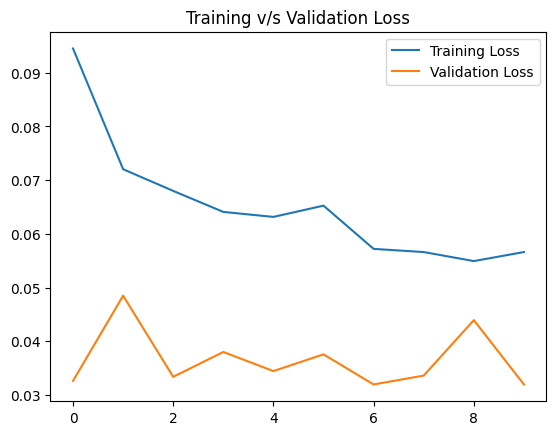

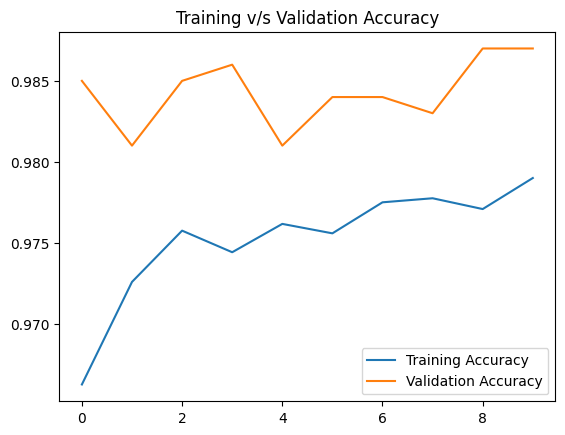

In [13]:
# Plotting Loss and accuracy of training vs validation 
plot_loss_curve(history_2)

1/1 [==============================] - 0s 43ms/step


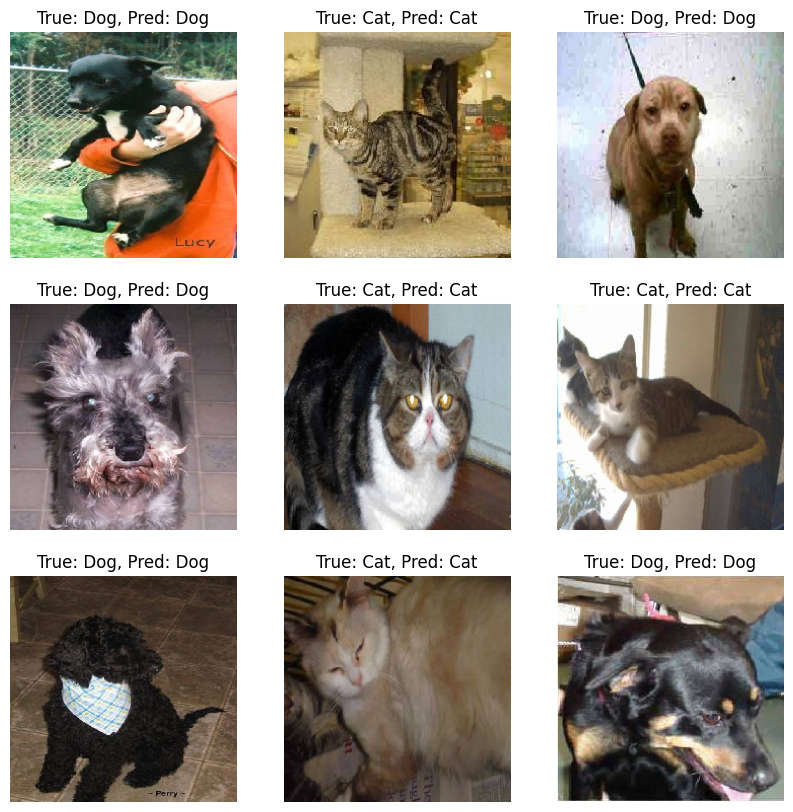

In [16]:
# Taking random images of test data and making predictions on them
visualize_predictions(model_2, test_data)

1/1 [==============================] - 0s 187ms/step
[[3.0023799e-07]]
cats
1/1 [==============================] - 0s 27ms/step
[[0.9999751]]
dogs


(None, None)

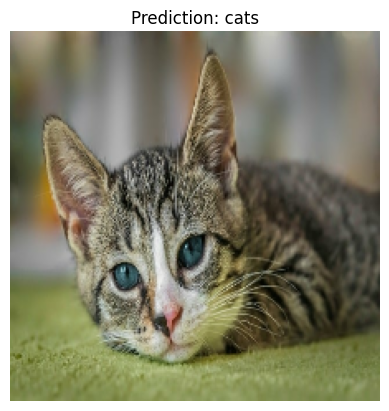

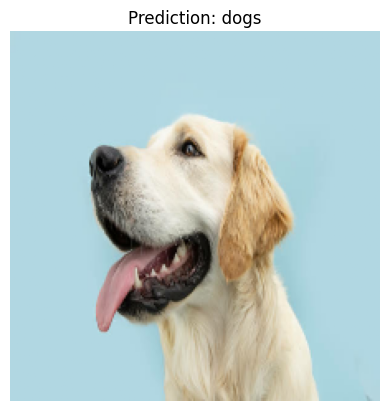

In [31]:
# Here pred and plot is my custom function to make prediction on custom images I downlaoded. It is not in training/test/validation data
pred_and_plot(model_2, 'images_prediction/the_cat.jpg', class_names), pred_and_plot(model_2, 'images_prediction/dog_2.jpg', class_names)

In [29]:
# Evaluate the model on the test data
y_pred = model_2.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate classification report
print(classification_report(test_data.classes, y_pred))

125/125 [==============================] - 17s 140ms/step
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      2000
           1       0.49      0.49      0.49      2000

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



In [30]:
# Saving the trained model
model_1.save('cat_vs_dog_model.h5')